<a href="https://colab.research.google.com/github/igorlysov/DigitalizationCommitteeTest/blob/main/Python_(analytics_department%2C_option_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Винишко
Вашему вниманию предлагается классическая задача с классическими методами  на классическом датасете с винами из sklearn.

In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_wine

Загрузите датасет, найдите среднее с дисперсией для каждого признака и отнормируйте данные. 

In [79]:
# Время кодить
wine = load_wine()
# Взлягем на сырые данные 
for key, value in wine.items():
    print(key,'\n',value,'\n')

data 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

frame 
 None 

target_names 
 ['class_0' 'class_1' 'class_2'] 

DESCR 
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in 

In [68]:
# Создадим датафрейм с нашими данными 
data = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names']+['target'])
data_without_target = data[wine['feature_names']]
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [62]:
# Проверим данные на наличие null и т.д.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    float64 
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    floa

In [63]:
# Посмотрим на разные статистические величины
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [28]:
variance = data.var()
mean = data.mean()

In [29]:
from sklearn.preprocessing import StandardScaler

In [54]:
# Нормируем наши данные с помощью Z-стандартизации
data_scaler = StandardScaler()
data_scaler.fit(data_without_target)

StandardScaler()

In [69]:
raw_norm = data_scaler.transform(data_without_target)
# Создадим датафрейм с нашими данными 
data_norm = pd.DataFrame(data=np.c_[raw_norm, data['target']], columns=wine['feature_names']+['target'])
# Преобразуем целевую переменную в категориальную
data_norm.target=data_norm.target.astype('int64').astype('category')
data_norm.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


.Попробуем изобразить данные на 2д. Примените алгоритм PCA к нормированным данным и изобразите их.

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [73]:
# Вжух
without_target = pd.DataFrame(data_norm[wine['feature_names']])
conf_mtx = without_target.corr()
conf_mtx

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [39]:
import seaborn as sns

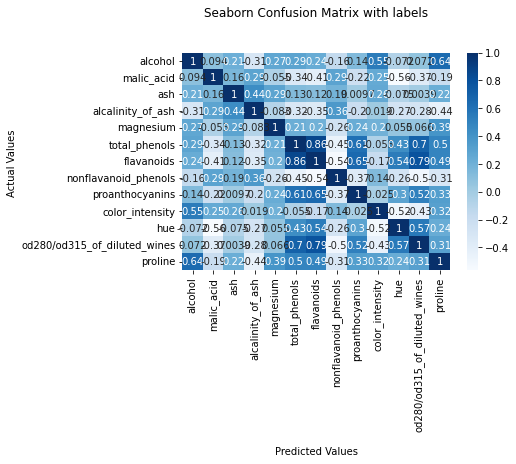

In [58]:
# Построим Confusion matrix
ax = sns.heatmap(conf_mtx, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

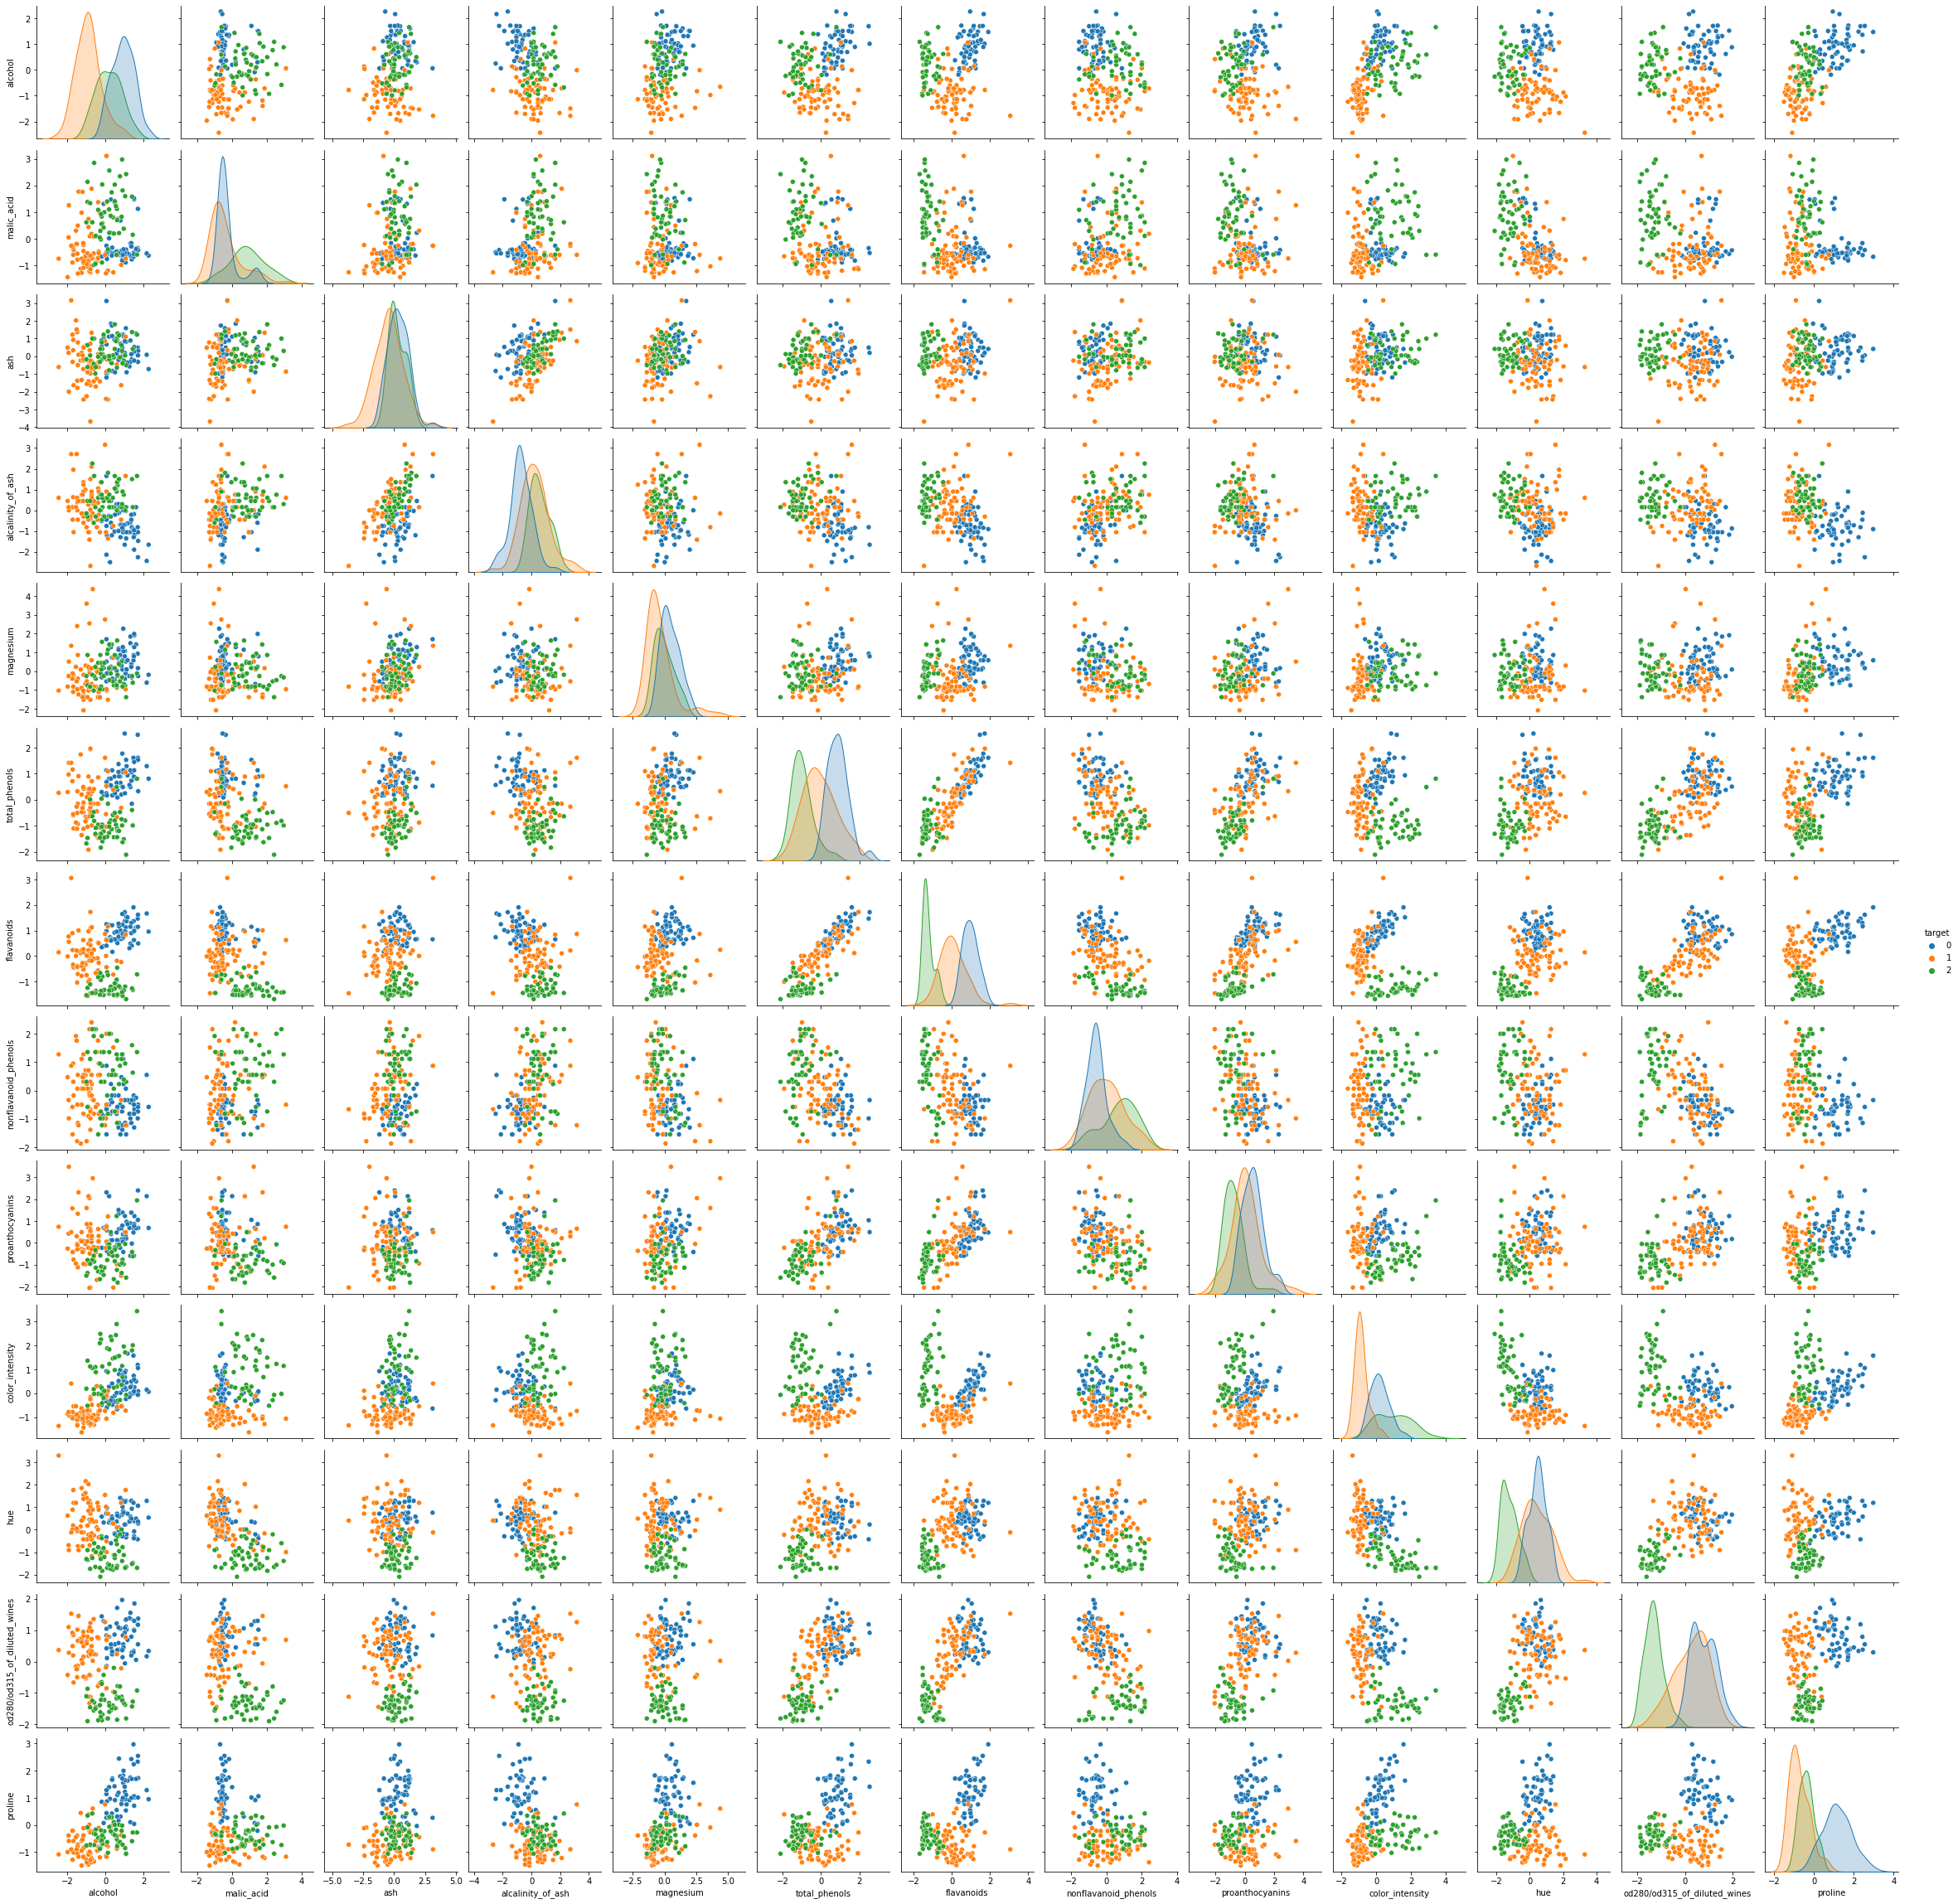

In [70]:
# Посмотрим на корреляцию между признаками с помощью PairPlot
sns.pairplot(data_norm,hue='target')

In [99]:
# Теперь произведем понижение размерности для применения PCA
X = without_target.values
y = data_norm['target'].values

#X = pd.DataFrame(X)
#y = pd.DataFrame(y)

In [100]:
pca = PCA(n_components=2)
pca_Comp = pca.fit_transform(X)
principal_data = pd.DataFrame(data = pca_Comp, columns = ['PC_1', 'PC_2'])
principal_data.head()

,PC_1,PC_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [121]:
pc_df = principal_data.values

In [101]:
final_data = pd.concat([principal_data, data_norm['target']], axis = 1)
final_data.head()

,PC_1,PC_2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


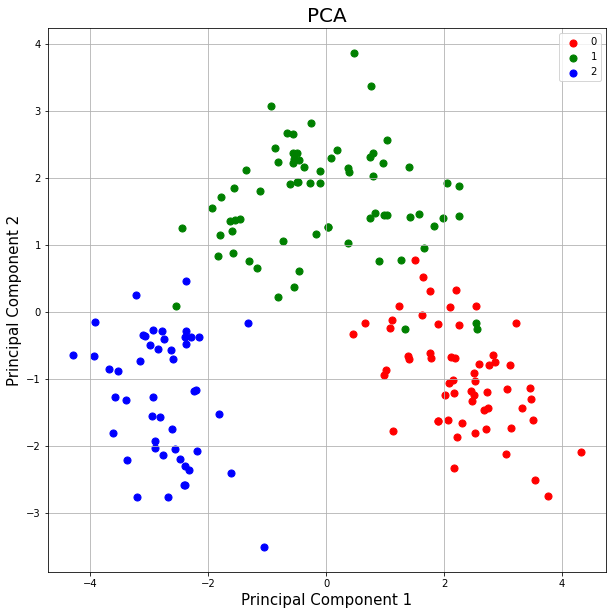

In [207]:
# Наконец изобразим данные в 2D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']

def pca_plot(targets, colors, ax, data):
  for target, color in zip(targets, colors):
      indices_of_class = data['target'] == target
      ax.scatter(
                  data.loc[indices_of_class, 'PC_1'], 
                  data.loc[indices_of_class, 'PC_2'],
                  c = color, 
                  s = 50
                )
  ax.legend(targets)
  ax.grid() 
pca_plot(targets, colors, ax, final_data)

Откластеризируете данные, полученный результат выведите и сравните с истиной.

In [92]:
# Еще немного
from sklearn.cluster import KMeans

In [132]:
# Будем кластеризовать с помощью метода "К-средних"
y_pred = KMeans(n_clusters=3).fit_predict(pc_df)

In [220]:
k_means = KMeans(n_clusters=3, max_iter=5)
k_means.fit(pc_df)

KMeans(max_iter=5, n_clusters=3)

In [221]:
y_pred = k_means.predict(pc_df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

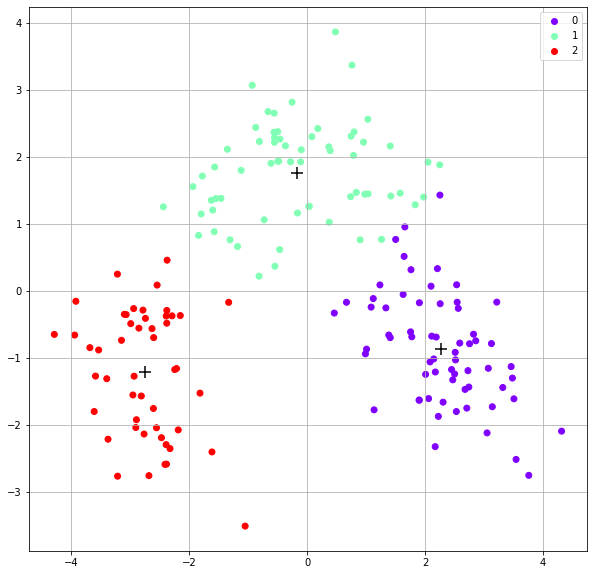

In [222]:
# Будем кластеризовать с помощью метода "К-средних"
fig = plt.figure(figsize = (10,10))
centroids = k_means.cluster_centers_
classes = ['0','1','2']
def kmeans_plot(data, centroids, y_pred, ax, classes):
  scatter = ax.scatter(pc_df[:,0],pc_df[:,1], c=y_pred, cmap='rainbow')
  ax.legend(handles=scatter.legend_elements()[0], labels=classes)
  ax.scatter(k_means.cluster_centers_[:,0] ,k_means.cluster_centers_[:,1], color='black', marker='+', s=150)
  ax.grid() 

kmeans_plot(pc_df, centroids, y_pred, plt, classes)

Text(0.5, 1.0, 'Распределение с помощью K-Means')

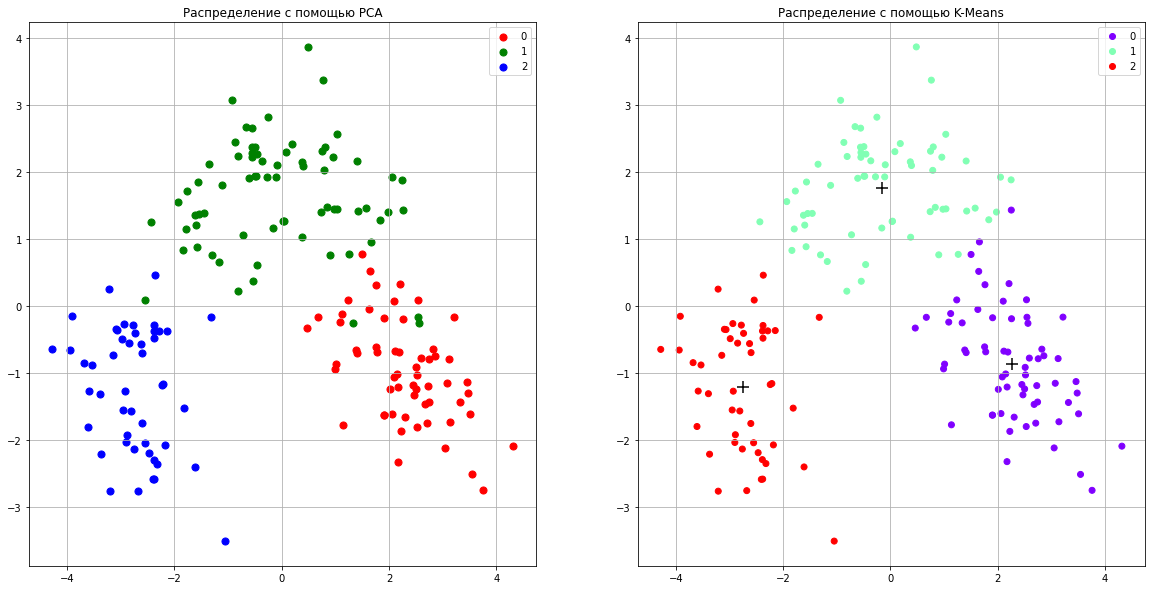

In [223]:
# Сравним

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
pca_plot(targets, colors, plt, final_data)
plt.title('Распределение с помощью PCA')

plt.subplot(1, 2, 2)
kmeans_plot(pc_df, centroids, y_pred, plt, classes)
plt.title('Распределение с помощью K-Means')
